# <font><b>第十二章  监督学习方法总结</b></font>

***

<font size=3>方法</font>|<font size=3>适用问题</font>|<font size=3>模型特点</font>|<font size=3>模型类型</font>|<font size=3>学习策略</font>|<font size=3>学习损失函数</font>|<font size=3>学习算法 </font>
:---|:---|:---|:---|:---|:---|:---
感知机|二类分类|分离超平面|判别模型|极小化误分点到超平面的距离|误分点到超平面距离|随机梯度下降
K近邻法|多类分类/回归|特征空间，样本点|判别模型|-|-|-
朴素贝叶斯法|多类分类|特征与类别的联合概率分布，条件独立假设|生成模型|极大似然估计，最大后验概率估计|对数似然损失|概率计算公式/EM算法
决策树|多类分类/回归|分类树，回归树|判别模型|正则化的极大似然估计|对数似然损失|特征选择，生成，剪枝
Logistic回归与最大熵模型|多类分类|特征条件下类别的条件概率分布，对数线形模型|判别模型|极大似然估计，正则化的极大似然估计|Logistic损失|改进的迭代尺度算法，梯度下降，拟牛顿法
SVM|二类分类|分离超平面，核技巧|判别模型|极小化正则化合页损失，软间隔最大化|合页损失|序列最小最优化算法(SMO)
提升方法|二类分类|弱分类器的线性组合|判别模型|极小化加法模型的指数损失|指数损失|前向分步加法算法
EM算法|概率模型参数估计|含隐变量概率模型|-|极大似然估计，最大后验概率估计|对数似然损失|迭代算法
隐马尔可夫模型|标注|观测序列与状态序列联合概率分布模型|生成模型|极大似然估计，最大后验概率估计|对数似然损失|概率计算公式，EM算法
条件随机场|标注|状态序列条件下观测序列的条件概率分布，对数线性模型|判别模型|极大似然估计，正则化极大似然估计|对数似然损失|改进的迭代尺度算法，梯度下降，拟牛顿法

***

### **一、模型**

1、**分类方法**：感知机、k近邻法、朴素贝叶斯法、决策树、Logistic回归与最大熵模型、SVM、提升方法；

    1) 感知机、k近邻法、朴素贝叶斯法、决策树 是简单的分类方法，具有模型直观、方法简单、实现容易等特点；
    
    2) Logistic回归与最大熵模型、SVM、提升方法 是复杂但更有效的分类方法，往往分类准确率更高；

2、**标注方法**：隐马尔可夫模型、条件随机场；通常条件随机场的标注准确率更高。

***

3、**判别方法**：直接学习条件概率分布 $P(Y|X)$ 或决策函数 $Y=f(X)$ 的方法为判别方法，对应的模型是判别模型。**感知机、k近邻法、决策树、Logistic回归与最大熵模型、SVM、提升方法、条件随机场。**

4、**生成模型**：首先学习联合概率分布 $P(X,Y)$ , 从而求得条件概率分布 $P(Y|X)$ 的方法是生成方法，对应的模型是生成模型。**朴素贝叶斯法、HMM**. 

  $\quad$ <font><i><b>可以用无监督学习的方法学习生成模型。如，用 EM 算法学习朴素贝叶斯模型及 HMM</b></i></font>



### **二、学习策略**

**二分类的监督学习** 中，
<font size=3> $\left\{ \begin{align} & SVM ,\quad &                  &合页损失函数：&             &  [1-yf(x)]_+ \\ 
                                     & Lotistic回归与最大熵模型，\quad &   &Lotistic损失函数：&     & log[1+exp(-yf(x))] \\
                                     & 提升方法，&                    &指数损失函数： &            & exp(-yf(x)) \end{align}\right.$ </font>

这3种损失函数都是 0-1损失函数的上界，具有相似的形状。 

**可以认为 SVM、Logistic回归与最大熵模型、提升方法 使用不同的代理损失函数（surrogate loss function）表示分类的损失，定义经验风险或结构风险，实现二类分类学习方法。** 

学习的策略是优化以下结构风险函数：
#### $$\min_{f\in \mathcal{H}} \frac{1}{N} \sum_{i=1}^N L(y_i,f(x_i)) + \lambda J(f)$$

1)、支持向量机用 $L_2$ 范数表示模型的复杂度。

2)、原始的Logistic回归与最大熵模型没有正则化项，可以给它们加上 $L_2$ 范数正则化项。

3)、提升方法没有显式的正则化项，通常通过早停止（early stopping）的方法达到正则化的效果。

4)、以上二类分类的学习方法可以扩展到多类分类学习以及标注问题，如标注问题的条件随机场可以看作是分类问题的最大熵模型的推广。


**概率模型的学习可以形式化为极大似然估计或贝叶斯估计的最大后验概率估计。** 学习的策略是极小化对数似然损失或极小化正则化的对数似然损失。对数似然损失可以写成： <font size=4> $ -logP(y|x) $</font>； 最大后验概率估计时，正则化项是先验概率的负对数。

1）决策树学习的策略是正则化的极大似然估计，损失函数是对数似然函数，正则项是决策树的复杂度。

2）Logistic回归与最大熵模型、条件随机场的学习策略是即可以看成是极大似然估计（或正则化的极大似然估计），又可以看成是极小化的Logistic损失（或正则化的Logistic损失）。

3）朴素贝叶斯模型、HMM 模型的无监督学习也是极大似然估计或最大后验概率估计，这时模型含隐变量。



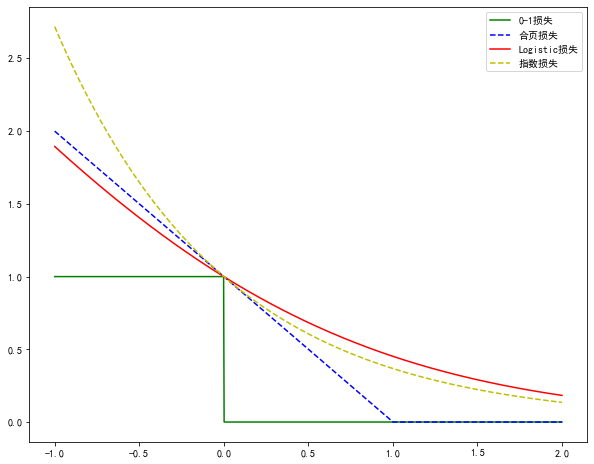

In [50]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1.0,2.0,1001)

y01 = x<0 ## 0-1损失函数

y_hinge = np.array([max(0,1-_x) for _x in x])## 合页损失函数 max(0,1-x)

y_log = np.log(1 + np.exp(-x))/np.log(2) ## Logistic损失

y_boost = np.exp(-x) ## 指数损失

# 画图
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(10,8))
plt.plot(x,y01,'g-',label="0-1损失")
plt.plot(x,y_hinge,'b--',label="合页损失")
plt.plot(x,y_log,'r',label="Logistic损失")
plt.plot(x,y_boost,'y--',label="指数损失")

plt.legend()

### **三、算法** —— 求解最优化问题

1、朴素贝叶斯与 HMM 模型的监督学习，最优解即极大似然估计值，可以由概率计算公式直接计算；

2、感知机、Logistic回归与最大熵模型、条件随机场的学习利用梯度下降法、拟牛顿法等。这些都是一般的无约束最优化问题的解法。

3、SVM学习，可以解凸二次规范的对偶问题。有序列最小最优化算法等。

4、决策树学习是基于启发式算法的典型例子，可以认为特征选择、生成、剪枝是启发式地进行正则化的极大似然估计。

5、提升方法利用学习的模型是加法模型、损失函数是指数损失函数的特点，启发式地从前向后逐步学习模型，以达到逼近最优化目标函数的目的。

6、EM算法是一种迭代的求解含隐变量概率模型参数的方法，它的收敛性可以保证，但是不能保证收敛到全局最优。

7、**SVM学习、Logistic回归与最大熵模型学习、条件随机场学习是凸优化问题，全局最优解保证存在。而其他学习问题则不是凸优化问题。**
